In [1]:
#import all the libraries needed to run the script
import pandas as pd
import matplotlib
import numpy as np

In [2]:
#fetch the first dataset
transactions=pd.read_csv('QVI_transaction_data.csv')

In [3]:
#view dataset
transactions.head(6)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,5/19/2019,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [4]:
transactions.dtypes

DATE               object
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [5]:
transactions['DATE']=pd.to_datetime(transactions['DATE'])
transactions.info
transactions.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [6]:
# find out how many values are missing
missing_values = transactions.isnull().sum()
print(missing_values)

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [7]:
#fetch the second dataset
customers = pd.read_csv('QVI_purchase_behaviour.csv')
customers.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
#check customer data tpes
customers.dtypes
missing_values2=customers.isnull().sum()
print(missing_values2)

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [9]:
customers.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [10]:
# Merge the two data frames on the 'LYLTY_CARD_NBR ' column
merged_df = transactions.merge(customers, on='LYLTY_CARD_NBR', how='left')

# Print the merged data frame
merged_df.shape

(264834, 10)

In [11]:
merged_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [26]:
#data preprocessing
# Filter the DataFrame by the words "chip" and "chips" in the "PROD_NAME" column
merged_df = merged_df[merged_df['PROD_NAME'].str.contains('|'.join([ "Chip","Chips"]))]
# Remove all special characters from the "PROD_NAME" column
# Split the strings into a list of words
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.split('<*>&/')

# Remove any special characters from each word
def remove_special_characters(word):
    return ''.join(ch for ch in word if ch.isalnum())

merged_df['PROD_NAME'] = merged_df['PROD_NAME'].apply(lambda words: [remove_special_characters(word) for word in words])

# Join the words back into a string
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].apply(lambda words: ' '.join(words))

merged_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,month
0,2018-10-17,1,1000,1,5,NaturalChipCompnySeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,10
2,2019-05-20,1,1343,383,61,SmithsCrinkleCutChipsChicken170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,5
3,2018-08-17,2,2373,974,69,SmithsChipThinlySCreamOnion175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,8
6,2019-05-16,4,4149,3333,16,SmithsCrinkleChipsSaltVinegar330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,5
8,2018-08-20,5,5026,4525,42,DoritosCornChipMexicanJalapeno150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,8


In [27]:
#Total sales based on customer membership
grouped_data=merged_df.groupby('PREMIUM_CUSTOMER')
total_revenue=grouped_data['TOT_SALES'].sum().sort_values(ascending=False)
print(total_revenue)

PREMIUM_CUSTOMER
Mainstream    197980.7
Budget        180184.9
Premium       133422.7
Name: TOT_SALES, dtype: float64


In [28]:
#shopping quantity items according to product name
product_bucket=merged_df.groupby(['PROD_NAME','PROD_QTY'])
famous_choice=product_bucket['TOT_SALES'].count().sort_values(ascending=False)
print(famous_choice)

PROD_NAME                          PROD_QTY
CobsPopdSeaSaltChips110g           2           2979
CobsPopdSwtChlliSrCreamChips110g   2           2950
ThinsPotatoChipsHotSpicy175g       2           2918
DoritosCornChipsCheeseSupreme170g  2           2910
SmithsCrinkleChipsSaltVinegar330g  2           2878
                                               ... 
SmithsCrinkleCutChipsOriginal170g  4              1
NaturalChipCoHonySoyChckn175g      3              1
CobsPopdSeaSaltChips110g           4              1
WWSupremeCheeseCornChips200g       3              1
                                   5              1
Name: TOT_SALES, Length: 158, dtype: int64


In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'no_of_times_bought')

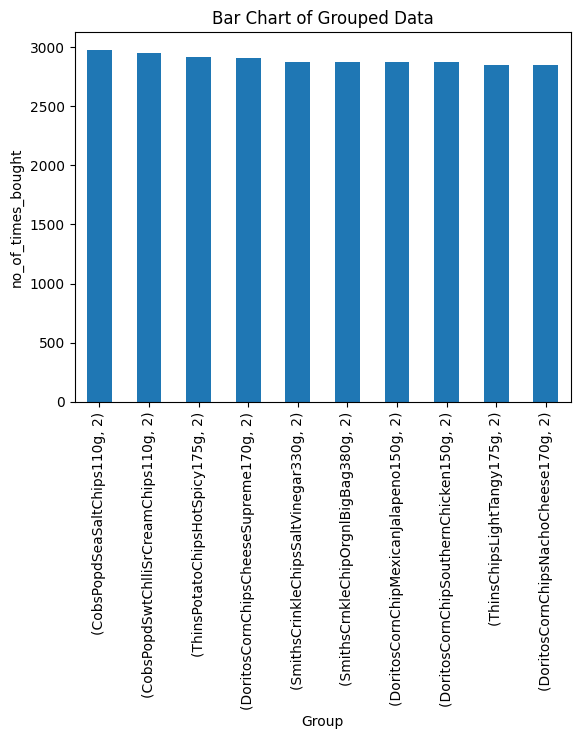

In [42]:
#plot the most common purchased combination
products1=product_bucket['TOT_SALES'].count().sort_values(ascending=False)
top_10= products1.head(10)
top_10.plot(kind='bar')
plt.title('Bar Chart of Grouped Data')
plt.xlabel('Group')
plt.ylabel('no_of_times_bought')

In [53]:
import csv
#customer segmentation according to revenue ,membership and lifestage
customer_seg=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','PROD_NAME'])
profitable_customer=customer_seg['TOT_SALES'].sum().sort_values(ascending=False)
with open('lists.csv', 'w', newline='') as f:
    # Create a csv.writer() object
    writer = csv.writer(f)

    # Iterate over the lists and write each row to the CSV file
    for row in profitable_customer:
        writer.writerow(row)

# Close the CSV file
f.close()


Error: iterable expected, not float

Text(0, 0.5, 'LIFE_STAGE')

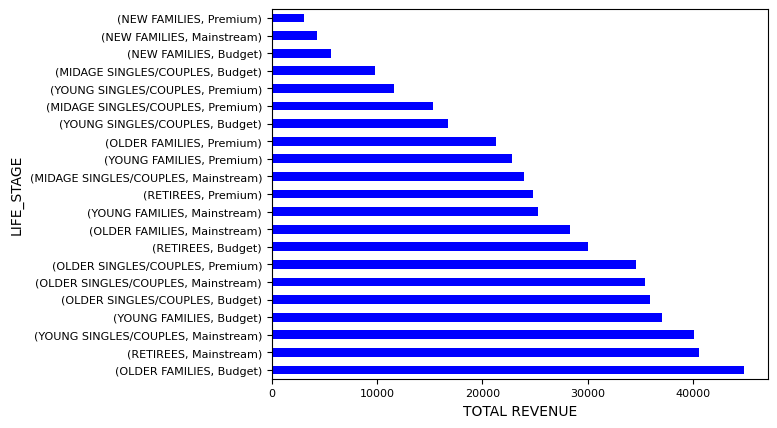

In [36]:
profitable_customer.plot(kind='barh',fontsize=8, color='blue' )
plt.xlabel('TOTAL REVENUE')
plt.ylabel('LIFE_STAGE')

In [47]:
unique_values = merged_df['LYLTY_CARD_NBR'].nunique()
print(unique_values)

43625


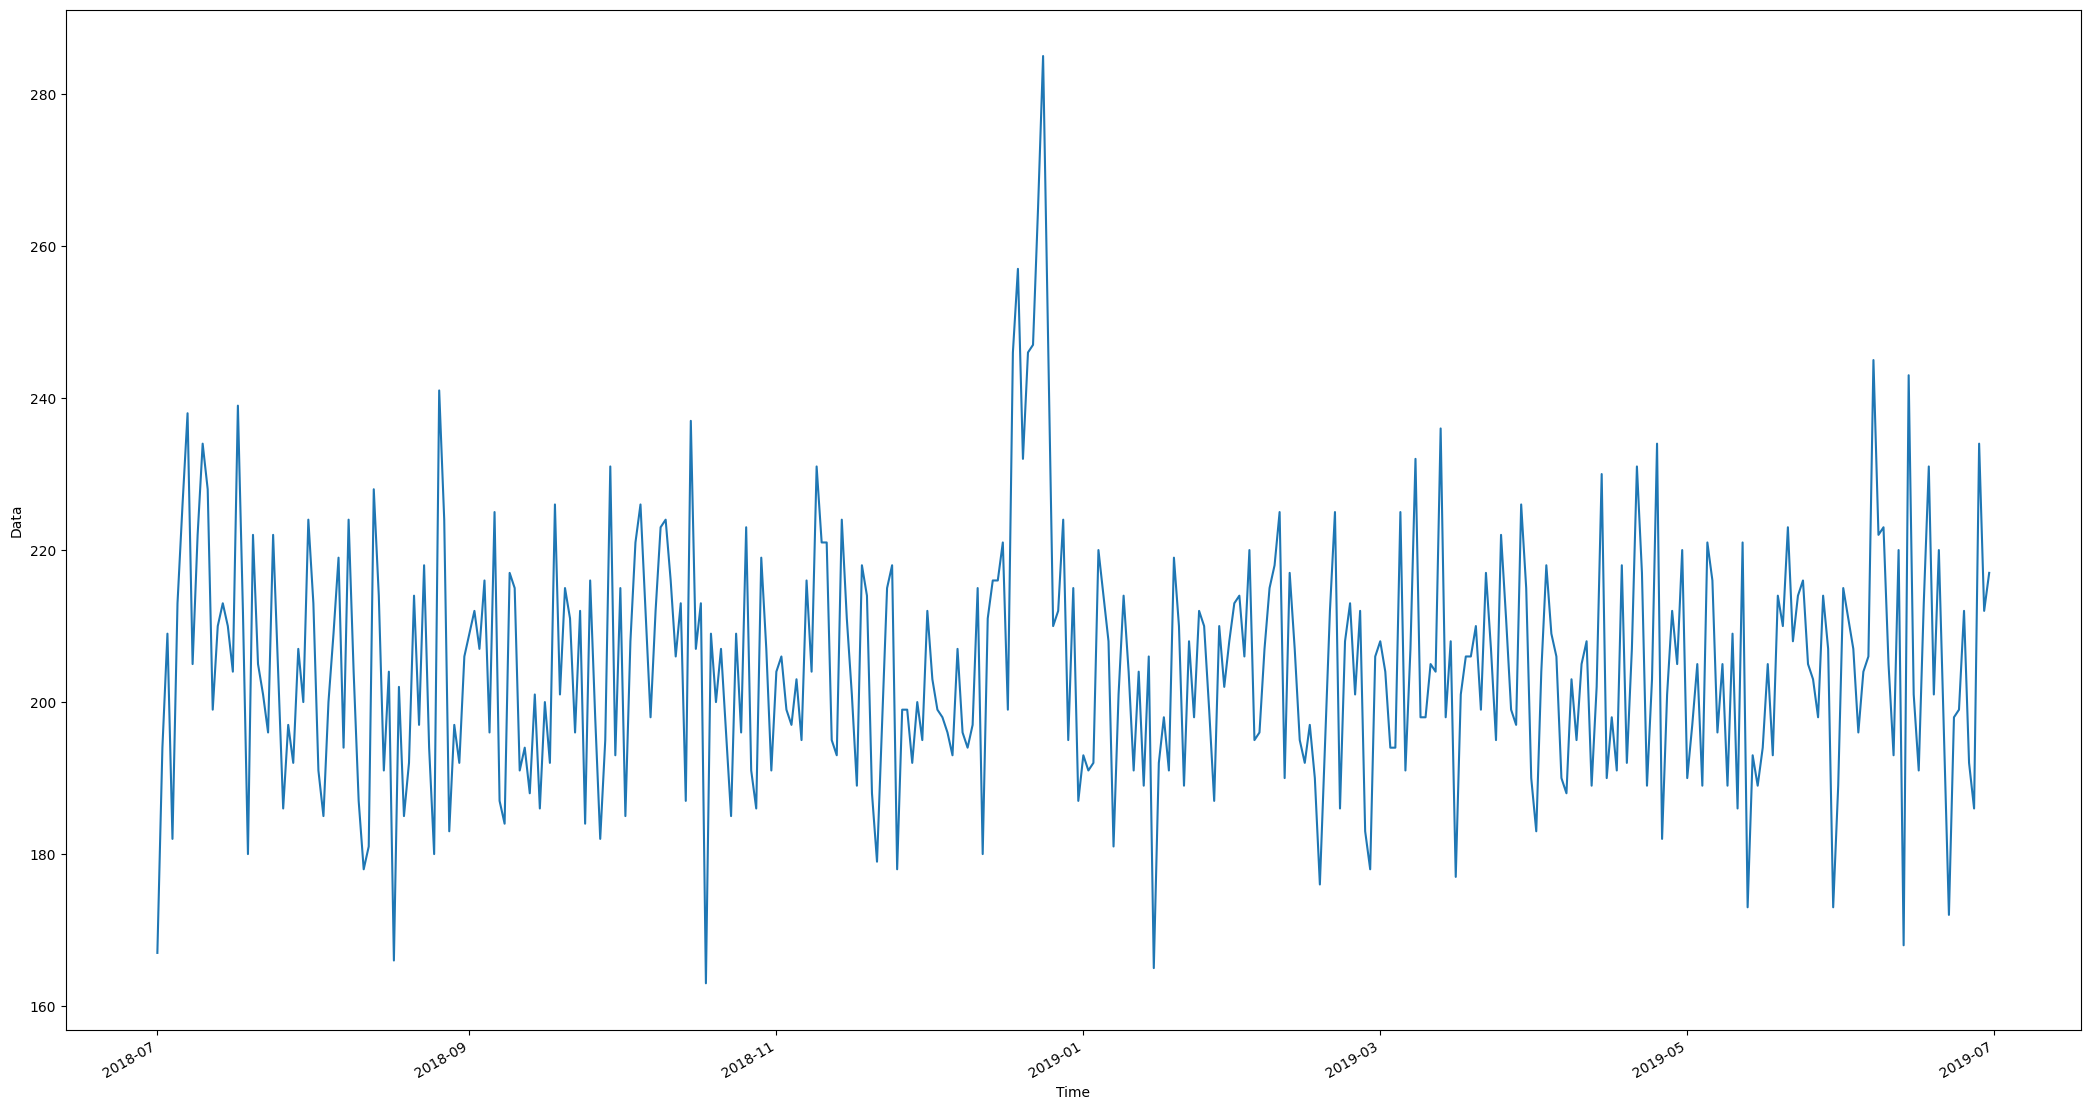

In [50]:
# Plot the time series data
merged_df['month'] = merged_df['DATE'].dt.month
time_seg=merged_df.groupby('DATE')
series_analysis=time_seg['TOT_SALES'].count().sort_values(ascending=False)
series_analysis.plot(kind='line', figsize=(26, 15))

# Add a title and axis labels to the plot
plt.xlabel('Time')
plt.ylabel('Data')

# Display the plot
plt.show()

In [ ]:
#customer segmentation according to revenue ,membership and lifestage
customer_seg=merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER',''])
profitable_customer=customer_seg['TOT_SALES'].sum().sort_values(ascending=False)